# Loading

In [ ]:
!pip install scanpy
!pip install anndata
!pip install pyVIA

In [ ]:
from pyVIA.core import *
import pyVIA.datasets_via as datasets_via
#from core_working_ import *
import pandas as pd
import umap
import scanpy as sc
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.8/dist-packages/phate/__init__.py


In [ ]:
#绘图参数设置
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [ ]:
!git clone https://github.com/ShobiStassen/VIA.git

Cloning into 'VIA'...
remote: Enumerating objects: 1977, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 1977 (delta 14), reused 0 (delta 0), pack-reused 1943
Receiving objects: 100% (1977/1977), 245.49 MiB | 19.07 MiB/s, done.
Resolving deltas: 100% (1171/1171), done.
Updating files: 100% (113/113), done.


In [ ]:
adata = sc.read('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_NKT_anno.h5ad')
adata

AnnData object with n_obs × n_vars = 12878 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
adata = adata[adata.obs['T/NK_type']=='CD4',:]
adata

View of AnnData object with n_obs × n_vars = 5680 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
sc.pp.neighbors(adata, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
sc.tl.leiden(adata)
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata,init_pos='paga')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:23)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


# VIA

In [ ]:
tsnem = adata.obsm['X_umap']
# 细胞类型标签
true_label = adata.obs['T/NK_celltype'].tolist()
# Umap标签
embedding = adata.obsm['X_umap']


In [ ]:
adata.obs['T/NK_celltype']

AACCGCGGTTACGACT-1-HP_POS_2    CD4.T.Tissue_Resident_Memory
AACTCCCAGAACAATC-1-HP_POS_2    CD4.T.Tissue_Resident_Memory
AACTCTTGTCTCCATC-1-HP_POS_2    CD4.T.Tissue_Resident_Memory
ACACCCTGTGACTACT-1-HP_POS_2    CD4.T.Tissue_Resident_Memory
ACAGCCGAGCCAGTAG-1-HP_POS_2    CD4.T.Tissue_Resident_Memory
                                           ...             
TTGTAGGGTTACTGAC-1-HP_POS_7    CD4.T.Tissue_Resident_Memory
TTTCCTCCAAGGTGTG-1-HP_POS_7    CD4.T.Tissue_Resident_Memory
TTTCCTCCAGACGTAG-1-HP_POS_7    CD4.T.Tissue_Resident_Memory
TTTCCTCGTACCTACA-1-HP_POS_7    CD4.T.Tissue_Resident_Memory
TTTGCGCGTAAAGTCA-1-HP_POS_7    CD4.T.Tissue_Resident_Memory
Name: T/NK_celltype, Length: 5680, dtype: category
Categories (4, object): ['CD4.T.Follicular_Helper', 'CD4.T.Naive', 'CD4.T.Reg', 'CD4.T.Tissue_Resident_Memory']

In [ ]:
#define parameters
ncomps, knn, random_seed, dataset, root_user  =30,20, 0,'T/NK_celltype', ['CD4.T.Naive']

v0 = VIA(adata.obsm['X_scVI'][:, 0:ncomps], 
         true_label,   # 细胞类型标签
         jac_std_global=0.15, #控制集群的细粒度。范围0-1是合理的。值接近0将导致更多且更小的集群
         dist_std_local=1, 
         knn=knn,  # 图的最近邻的已知数
         cluster_graph_pruning_std=0.15, 
         too_big_factor=0.3, # 超过整个细胞群体30%的亚群将被重新聚类。值0.1-0.3运行良好
         root_user=root_user, # 起始细胞
         preserve_disconnected=True, # 尝试链接起由于剪枝带来的碎片，如果轨迹存在断裂情况，设置为Fasle
         dataset='group', # Group ID，会基于提供的 root_user 参数的类型进行设置
         random_seed=random_seed)#, piegraph_arrow_head_width=0.2,             piegraph_edgeweight_scalingfactor=1.0)  
v0.run_VIA()

2023-01-28 06:46:51.996441	Running VIA over input data of 5680 (samples) x 30 (features)
2023-01-28 06:46:51.996534	Knngraph has 20 neighbors
2023-01-28 06:46:55.971509	Finished global pruning of 20-knn graph used for clustering at level of 0.15. Kept 48.3 % of edges. 
2023-01-28 06:46:56.002111	Number of connected components used for clustergraph  is 1
2023-01-28 06:46:56.219577	Commencing community detection
2023-01-28 06:46:56.343275	Finished running Leiden algorithm. Found 53 clusters.
2023-01-28 06:46:56.346475	Merging 37 very small clusters (<10)
2023-01-28 06:46:56.349034	Finished detecting communities. Found 16 communities
2023-01-28 06:46:56.349563	Making cluster graph. Global cluster graph pruning level: 0.15
2023-01-28 06:46:56.365630	Graph has 1 connected components before pruning
2023-01-28 06:46:56.368700	Graph has 1 connected components before pruning
2023-01-28 06:46:56.369632	0.0% links trimmed from local pruning relative to start
2023-01-28 06:46:56.369703	60.5% links

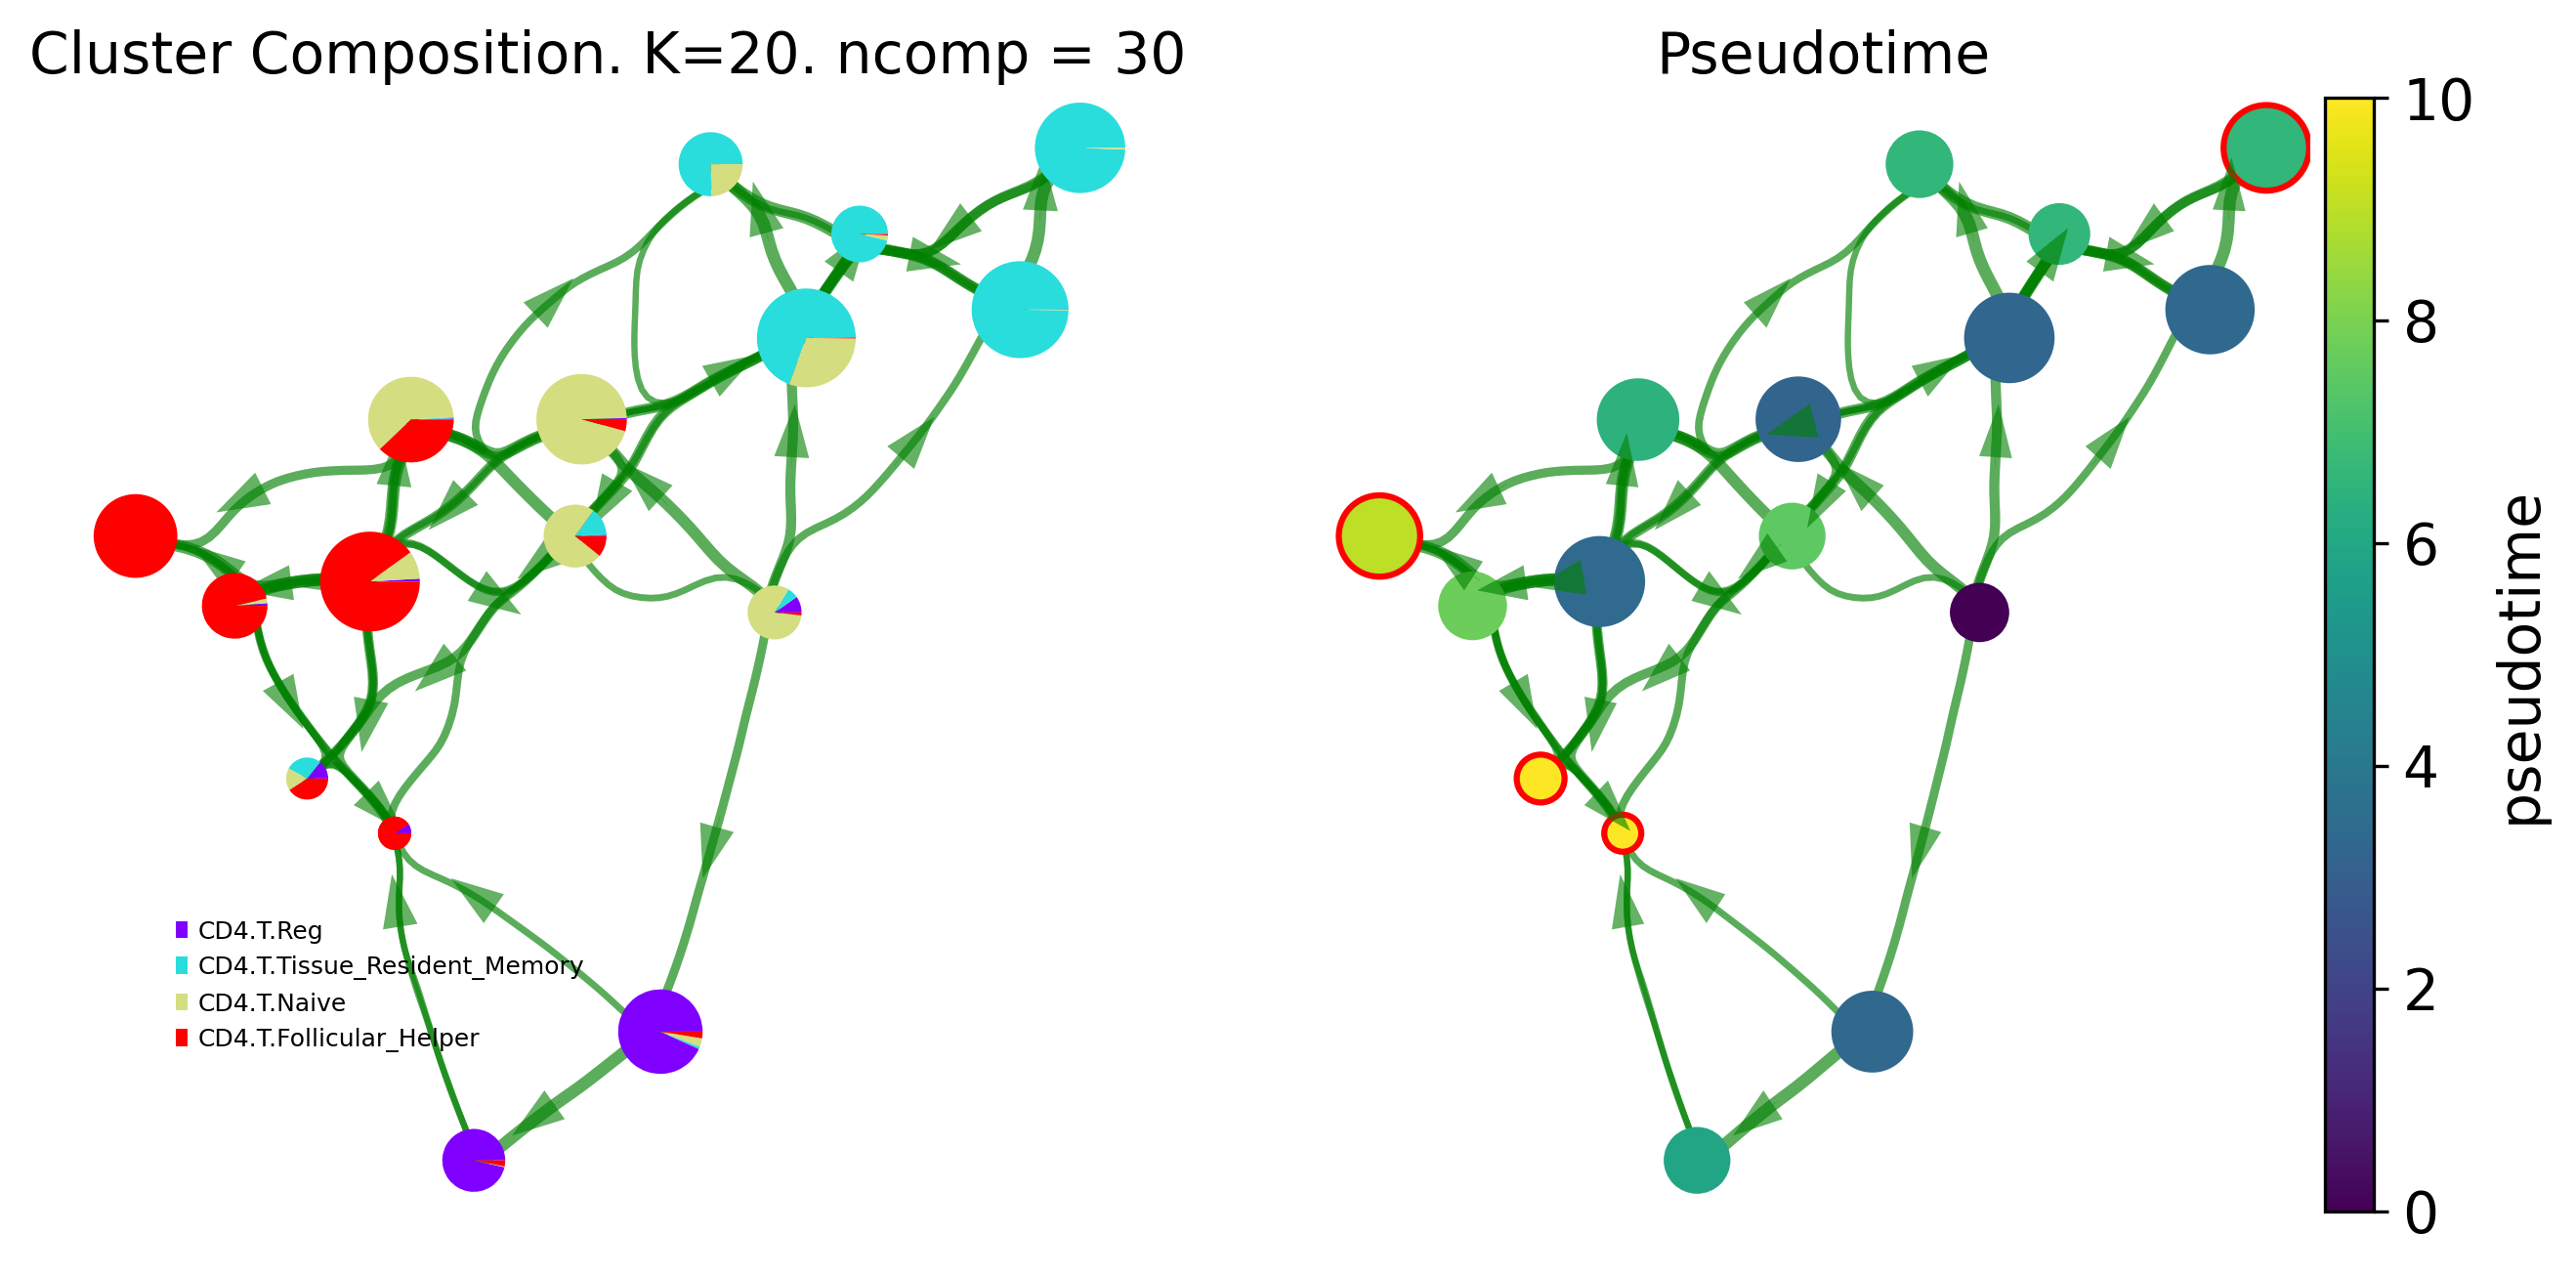

In [ ]:
# VIA graph 
# 细胞组成图和伪时序图

fig, ax, ax2= draw_piechart_graph(via0=v0, 
                  type_data='pt', # 可选择‘pt'(可视化伪时序). or ‘gene’
                  title='Toy multifurcation', #
                  cmap='viridis', # 颜色
                  ax_text=False, # 如果不需要细胞类型标签可以选择False(别选True，太辣眼睛了)
                  gene_exp='', # 如果需要绘制基因强度，可以在输入基因名
                  alpha_edge=0.4,  # 不知道有啥用
                  linewidth_edge=1.5,  # 设置线的宽度
                  edge_color='green',  # 设置线的颜色
                  headwidth_arrow=0.09, # 设置箭头大小
                  )
fig.set_size_inches(10,5)

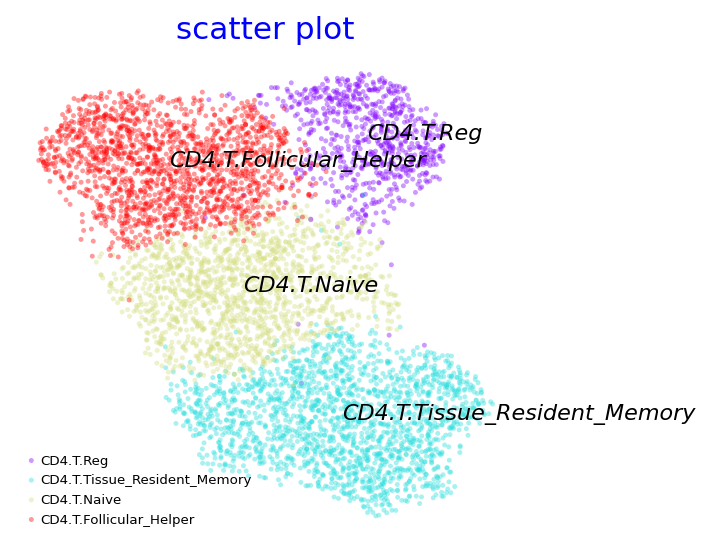

In [ ]:
f, ax = plot_scatter(embedding = embedding,  #二维坐标矩阵
            labels = v0.true_label, # 标签或者字符串列表（用于可视化对象）
            cmap = 'rainbow',  # 颜色标签
            s = 5,     # 控制
            alpha = 0.4,   # 控制亚群颜色深浅度，数字越小越浅。
            edgecolors = 'None',
            title= '',  # title设置
            text_labels = True, # 是否显示亚群的标签
            color_dict = None,  # list，给亚群提供颜色信息
            categorical = None, 
            via_object = None, 
            sc_index_terminal_states=None, 
            true_labels=[]
            ) # 绘制散点图

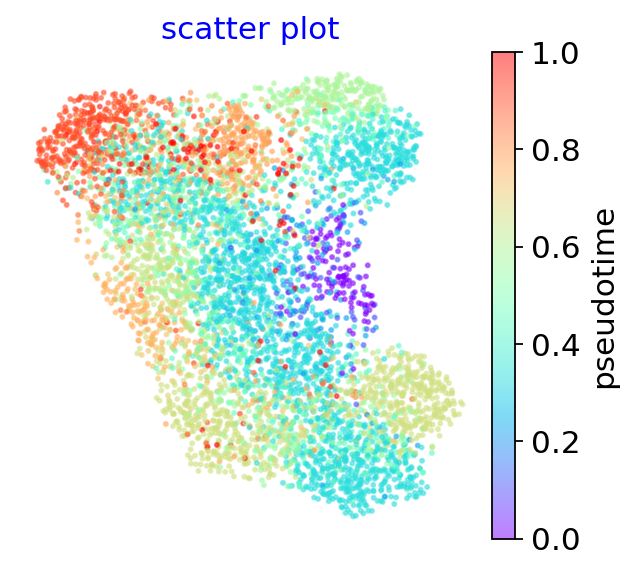

In [ ]:
f, ax = plot_scatter(embedding = embedding, labels = v0.single_cell_pt_markov)

In [ ]:
via_streamplot(v0,
        embedding,
        scatter_size = 50, # 散点大小
        scatter_alpha = 0.5,  # 散点深浅调整
        marker_edgewidth = 0.1, # 散点轮廓
        density_stream = 2,  # 场线间距
        smooth_transition = 1, # 概率转移矩阵平滑参数
        # color_scheme = 'time',  设置为time则显示伪时序
        add_outline_clusters = False, # 不知道有啥用
        )

In [ ]:
fig, ax, ax1 = draw_trajectory_gams(via_coarse=v0,     # 不要想太多，这个和下面参数都是v0
                    via_fine= v0,
                    embedding=embedding,  # 可视化二维坐标
                    draw_all_curves=False, # 如果聚类图有太多的边，无法以可视化的方式进行投影，那么将其设置为 False，以获得图形路径的简化视图
                    dpi=80,
                    arrow_width_scale_factor = 15, # 箭头宽度比例因子
                    linewidth = 2, # 线宽
                    )


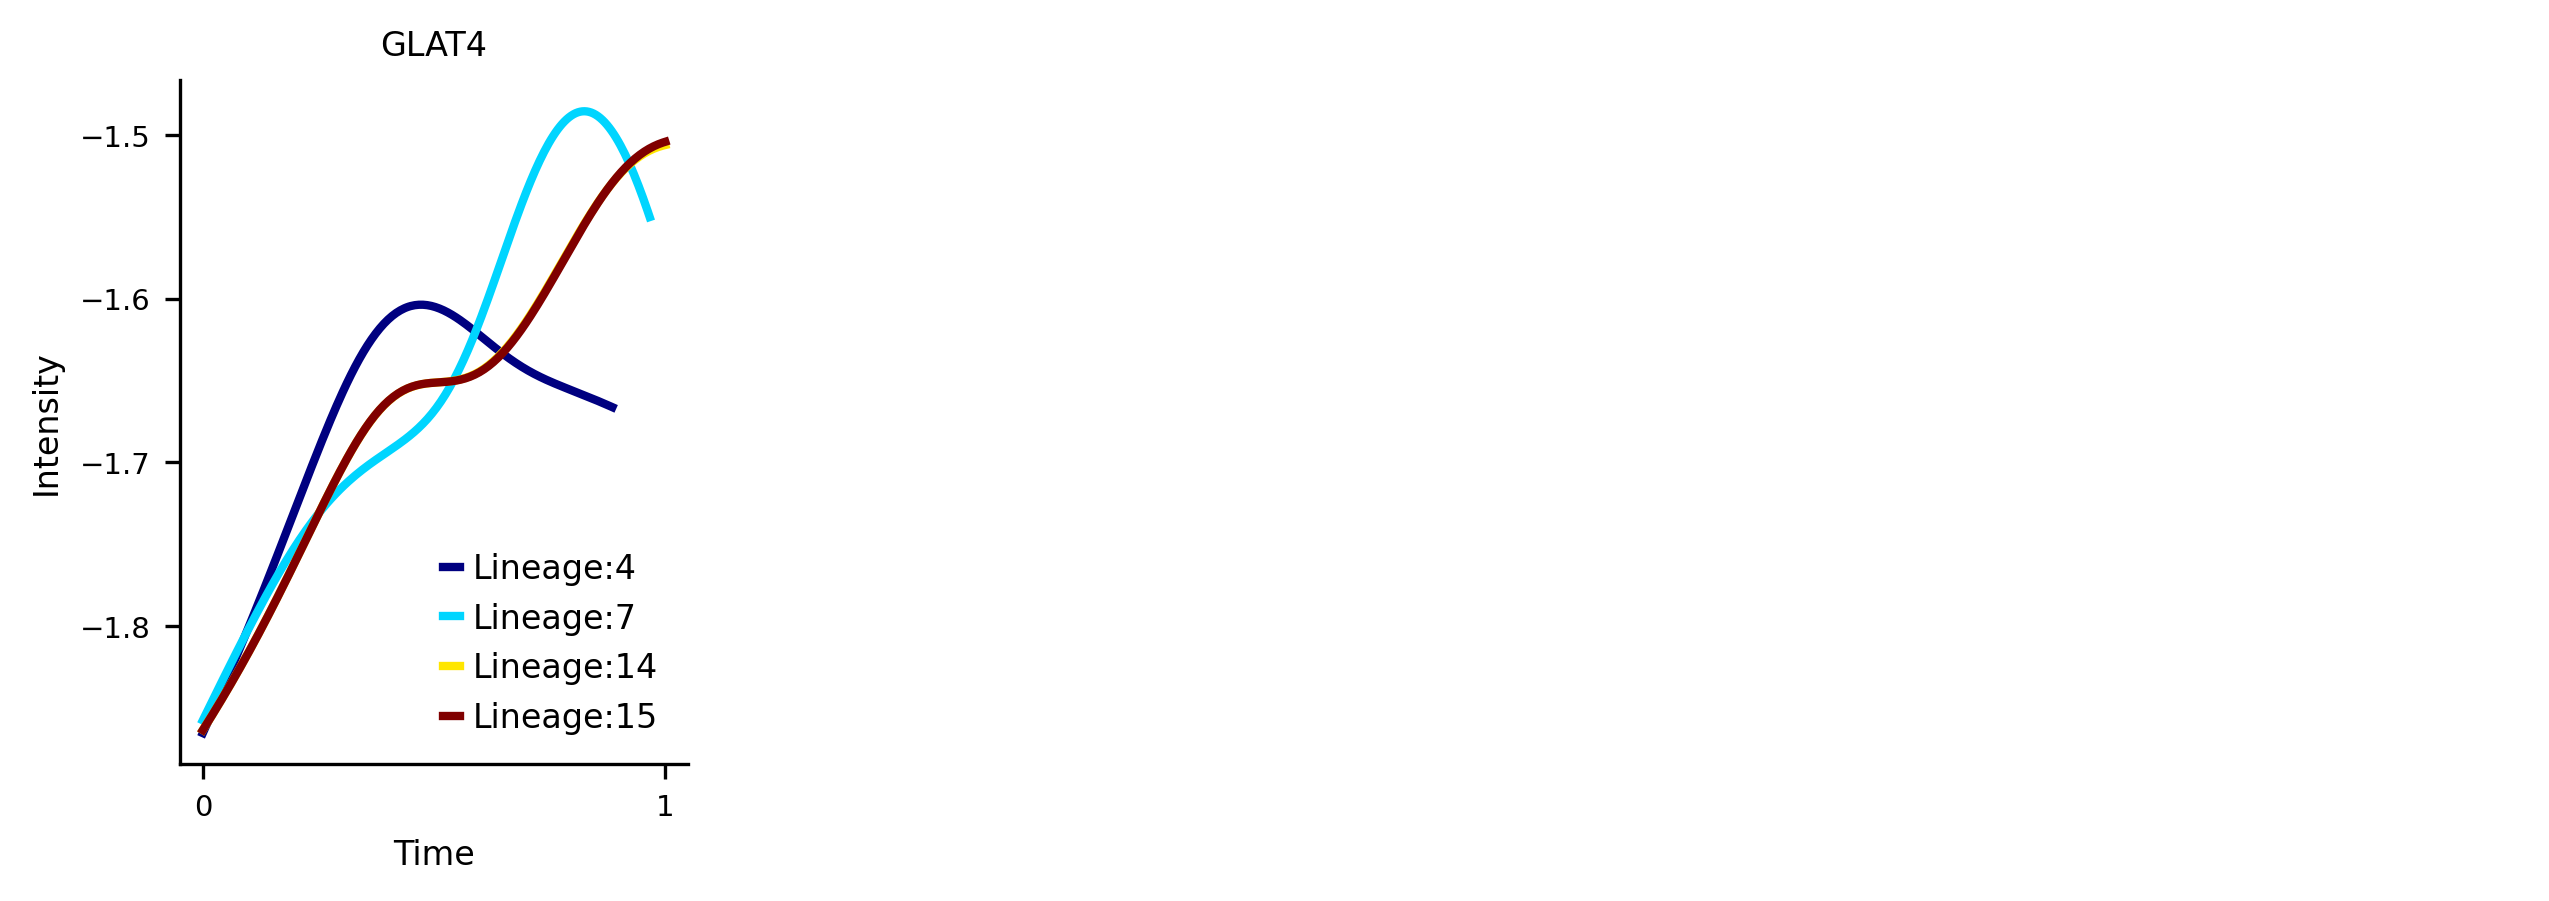

In [ ]:
df_subset = pd.DataFrame(adata.obsm['X_pca'][:, 0:1], columns=['GLAT4'])
f, axs = get_gene_expression(via0=v0, gene_exp=df_subset, cmap='jet',linewidth=2, fontsize_=8, spline_order=4, n_splines=10) #default parameters shown here for retrieving gene expression
f.set_size_inches(10,3)


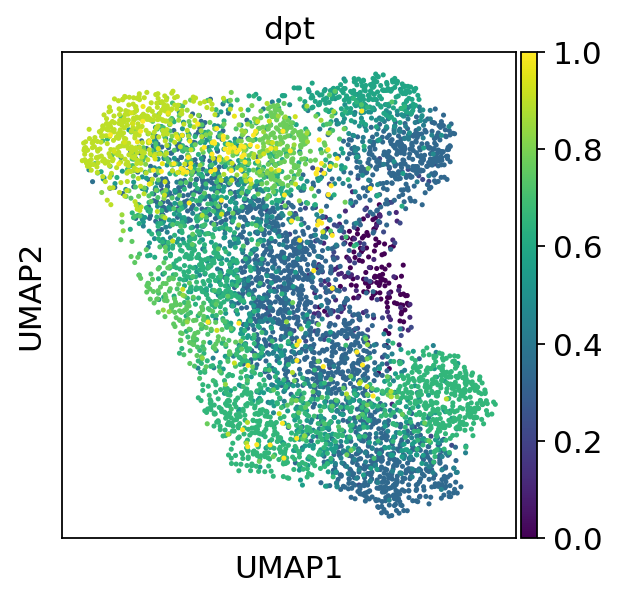

In [ ]:
adata.obs['dpt'] = v0.single_cell_pt_markov
sc.pl.umap(adata,color=['dpt'])

## 箱线图

参考：https://starlitnightly.github.io/bioinformatic_tutorial/PLOT/plot_2.html

In [ ]:
#获取箱子位置的函数，如果是两个箱子，那么其应该是在坐标两侧根据width分隔
#如果是三个箱子，那么坐标的位置箱子width各占一半，再根据width进行分隔
#设置间距函数
def ticks_range(x,width):
    nticks=[]
    pticks=[]
    start=-0
    end=0
    for i in range(x//2):
        nticks.append(start-width)
        start-=width
        pticks.append(end+width)
        end+=width
    if x%2==0:
        ticks=nticks+pticks
    elif x%2==1:
        ticks=nticks+[0]+pticks
    return ticks

In [ ]:
import random
import matplotlib.patches as mpatches

data = adata.obs

#获取需要分割的数据
hue='T/NK_celltype'
hue_datas=list(set(data[hue]))

#获取箱线图的横坐标
x='Sample'
ticks=list(set(data[x]))

#在这个数据中，我们有6个不同的癌症，每个癌症都有2个基因（2个箱子）
#所以我们需要得到每一个基因的6个箱线图位置，6个散点图的抖动
plot_data1={}#字典里的每一个元素就是每一个基因的所有值
plot_data_random1={}#字典里的每一个元素就是每一个基因的随机20个值
plot_data_xs1={}#字典里的每一个元素就是每一个基因的20个抖动值


#箱子的参数
width=0.4 # 箱子的间隔
length = 0.3 # 箱子的宽度
y='dpt'
for hue_data,num in zip(hue_datas,ticks_range(len(hue_datas),width)):
    data_a=[]
    data_a_random=[]
    data_a_xs=[]
    for i,k in zip(ticks,range(len(ticks))):
        test_data=data.loc[((data[x]==i)&(data[hue]==hue_data)),y].tolist()
        data_a.append(test_data)
        if len(test_data)<50:
            data_size=len(test_data)
        else:
            data_size=50
        random_data=random.sample(test_data,data_size)
        data_a_random.append(random_data)
        data_a_xs.append(np.random.normal(k*len(hue_datas)+num, 0.04, len(random_data)))
    #data_a=np.array(data_a)
    data_a_random=np.array(data_a_random)
    plot_data1[hue_data]=data_a 
    plot_data_random1[hue_data]=data_a_random
    plot_data_xs1[hue_data]=data_a_xs

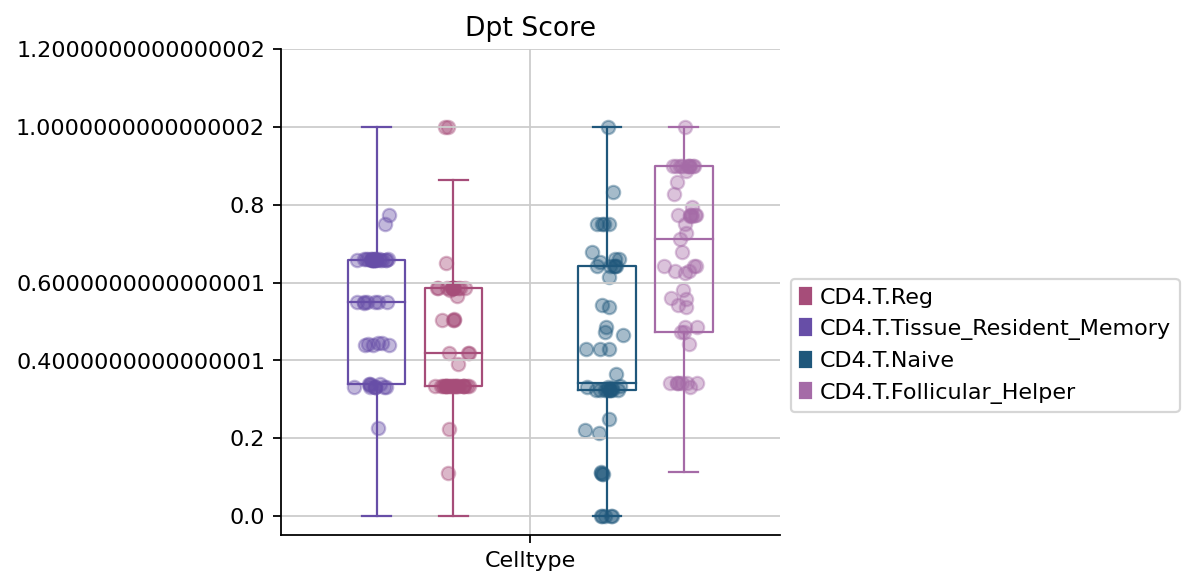

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
#色卡
palette=['#a64d79','#674ea7','#1F577B', '#A56BA7', '#E0A7C8']
#绘制箱线图
for hue_data,hue_color,num in zip(hue_datas,palette,ticks_range(len(hue_datas),width)):
    b1=ax.boxplot(plot_data1[hue_data], 
                  positions=np.array(range(len(ticks)))*len(hue_datas)+num, 
                  sym='', 
                  widths=length,)
    plt.setp(b1['boxes'], color=hue_color)
    plt.setp(b1['whiskers'], color=hue_color)
    plt.setp(b1['caps'], color=hue_color)
    plt.setp(b1['medians'], color=hue_color)

    clevels = np.linspace(0., 1., len(plot_data_random1[hue_data]))
    for x, val, clevel in zip(plot_data_xs1[hue_data], plot_data_random1[hue_data], clevels):
        plt.scatter(x, val,c=hue_color,alpha=0.4)

#坐标轴字体
fontsize=10
#修改横坐标
ax.set_xticks(range(0, len(ticks) * len(hue_datas), len(hue_datas)), ['Celltype'],fontsize=fontsize)
#修改纵坐标
yticks=ax.get_yticks()
ax.set_yticks(yticks[yticks>=0],yticks[yticks>=0],fontsize=fontsize)


# 标签生成
labels = hue_datas  #legend标签列表，上面的color即是颜色列表
color = palette
#用label和color列表生成mpatches.Patch对象，它将作为句柄来生成legend
patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(hue_datas)) ] 
ax.legend(handles=patches,bbox_to_anchor=(1, 0.55), ncol=1,fontsize=fontsize)

#设置标题
ax.set_title('Dpt Score',fontsize=fontsize+2)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

#fig.savefig(current_path+"figures/fig_boxplot.png",dpi=300,bbox_inches = 'tight')